##   

**1.	Explain the basic architecture of RNN cell.** 

- Ans : RNN is Recurrent Neural Network, is used vastly to process and predict sequential data, e.g. text data and temporal data. The main difference of RNN w.r.to Feed Forward Neural network is : each RNN cell has its feedback loop 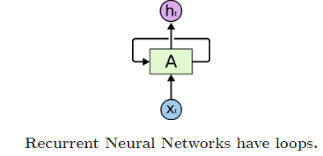
  which maintains the sequence order of the data which helps the network to remeber the earlier inputs. This kind of loop is not there in FFN. 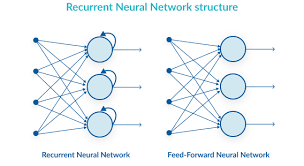 A feed-forward neural network has only one route of information flow: from the input layer to the output layer, passing through the hidden layers. The data flows across the network in a straight route, never going through the same node twice.




   Now, let us understand how the looping thing in RNN works. 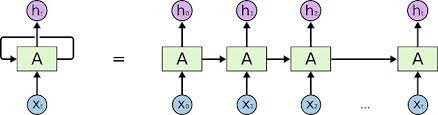
  
  In the above diagram (on the left) a chunk of neural network, $A$, looks at some input $x_t$ and outputs a value $h_t$. A loop allows information to be passed from one step of the network to the next. This neural network can be thought of as multiple copies of the same network, each passing a message to a successor. This network can be understood by unfolding it as shown on the right side. At time t = 0, the cell $A$ takes the input $X_0$ and gives output $h_0$. At the next time stamp, t = 1, the cell takes the input $X_1$ along with $h_0$ and so on for the other timestamps. These $h_i$s are known as hidden state output and they act as memory cells, which maintains the sequence and help in predictions. So, for a given time t, the input taken by $A$ is the input at time t, i.e. $X_t$ and the output from the previous hidden state. This way it keeps remembering the context while training.
  
  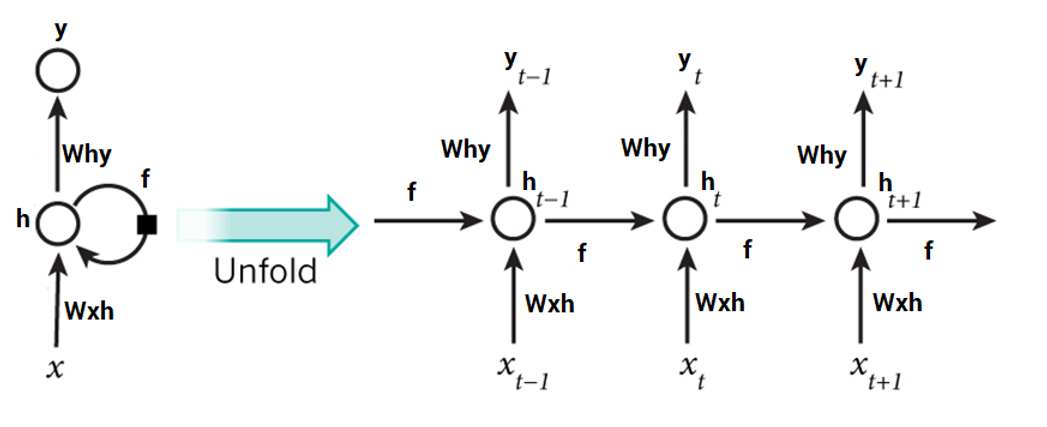
  Mathematically, one can write, for current state : $h_t = f(h_{t-1}, X_t)$.   
  After applying activation function, the hidden state $h_t$ becomes : $h_t = tanh(W_{hh}.h_{t-1} + W_{hx}.x_t)$  
  Here, $W$ is weight, $h$ is the single hidden vector, $W_{hh}$ is the weight at previous hidden state, $W_{hx}$ is the 
  weight at current input state, $tanh$ is the Activation funtion, that implements a Non-linearity that squashes 
  the activations to the range.   
  
  The Recurrent neuron, in this case, is just considering the immediately previous state. For longer sequences, the equation can involve multiple such states. Once the final state is calculated we can go on to produce the output. In this case the output is given by : $y_t = W_{hy}. h_t$. This expression can also be written as : $y = f_o (h_t)$
  
  One thing one should note that, say if we have four inputs to be given to the network, during a recurrence formula, the same function and the same weights are applied to the network at each time step.


**2.	Explain Backpropagation through time (BPTT)** 

- Ans : RNN are trained in the same way as neural networks, i.e. the forward pass takes place, the loss is calculated and then backpropagation takes place to minimize the loss function. Though here the backpropagation is a bit different from the normal neural networks. As RNN deals with the sequential data, it is evident that for each time step the function dependencies of backpropagation will be different and one needs to take in account all these. As the parameters are shared by all-time steps in the network, the gradient at each output depends not only on the calculations of the current time step but also on the previous time steps. When dealing with multiple time steps, the gradients of each time step should be summed up. But beyond this, due to the interconnected nature of hidden states across time, it's crucial to accumulate the gradients of these hidden states as well. For this, you need to multiply the gradients of hidden states together in each time step.   
  A very good explanation can be found out : https://www.pycodemates.com/2023/08/backpropagation-through-time-explained-with-derivations.html#:~:text=The%20Basic%20Intuition%20of%20BPTT&text=In%20RNNs%2C%20the%20data%20is,each%20element%20of%20the%20sequence. 



**3.	Explain Vanishing and exploding gradients** 

- Ans : During BPTT, if one of the gradient reaches zero, then because of the chain rule, all the gradients becomes zero. Because of this, the model learns no more. This is known as Vanishin Gradient problem. On the other hand, if the gradient becomes large (> 1), they get even larger with each pass and eventualy blows up resulting NAN and then the model crashes. This is known as the exploding gradient problem. 

  The vanishing gradient problem is far more threatening as compared to the exploding gradient problem, where the gradients become very very large due to a single or multiple gradient values becoming very high. The reason being the exploding gradient problem can be easily solved by clipping the gradients at a predefined threshold value.


**4.	Explain Long short-term memory (LSTM)** 

- Ans : Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation. In an LSTM network, three gates are present: 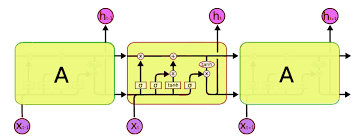


    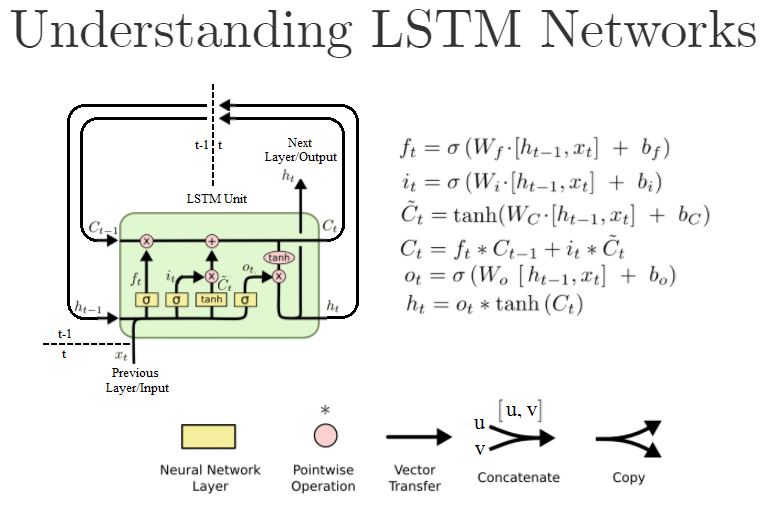
    A LSTM cell contains 3 kinds of gates, which helps to remember the important data and forget the not so important data and finally we have an output gate. The gates are shown in the above figure. $C_{t-1}$ and $h_{t-1}$ is the cell state and the hidden state from the previous LSTM cell resepectively. $f_t$ is the output of forget gate, $i_t$ is the output of the input gate for the t$^{th}$ time stamp, $o_t$ is the output of output gate. In an LSTM, the forget gate decides what is relevant to keep from prior steps. The input gate decides what information is relevant to add from the current step. The output gate determines what the next hidden state should be.
    


**5.	Explain Gated recurrent unit (GRU)** 

- Ans : GRU is another type of recurrent neural network and used vastly to train sequential data. The idea of GRU is very similar to that of LSTM but there are significant difference in the way of implementation. 

    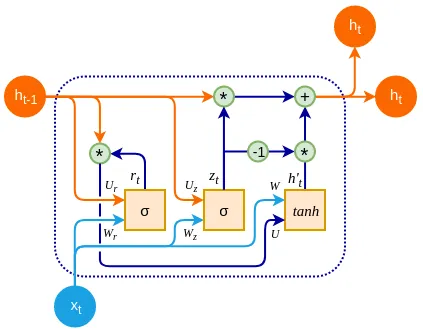
    
    GRU has two gates, namely, the reset gate and update gate. The reset gate determines how much of the previous hidden state to forget, while the update gate determines how much of the candidate activation vector to incorporate into the new hidden state.
    
    Mathematically this can be realized as : 
    - Update gate : $z_t = \sigma(W_z . x_t + U_z . h_{t-1} )$ 
    
    - Reset gate : $r_t = \sigma(W_r . x_t + U_r . h_{t-1} )$ 
    
    where, $x_t$ is plugged into the network unit, it is multiplied by its own weight $W_z$. $h_{t-1}$ has the information from  the previous t-1 units and is multiplied by its own weight $U_z$. Both results are added together and a sigmoid activation function is applied to squash the result between 0 and 1. The same idea is used for the reset gate, only the weight factors are different for the reset gate. 
    
    - The current memory content is obtained from the reset gate, which will preserve the relevant information from the past : $h_t' = tanh(W . x_t + r_t \bigodot U. h_{t-1})$. The symbol '$\bigodot$' signifies, elementwise product between the reset gate and $U.h_{t-1}$. This particular operation helps to keep the relevant information from the previous time steps. 
    
    - Final memory at current time step : This is done using the update gate. It updates the information from the previous time stamp and also inlcudes the information from the present time stamp. $h_t = z_t \bigodot h_{t-1} + (1 - z_t) \bigodot h_t'$ 
    
    
   The thing to be noted is, if $z_t$ is close to 1 then the model keep majority of the previous information and will ignore a big portion of the current content. The reverse scenario will take place if $z_t$ is close to 0. 

**6.	Explain Peephole LSTM** 

- Ans : Peephole LSTM is a type of Long Short-Term Memory (LSTM) network. It is an extension of the traditional LSTM network that allows for the direct connection between the current cell state and the current input gate. This direct connection allows the network to make use of more contextual information when making decisions about how to process incoming input. Additionally, peephole LSTM networks are able to better capture long-term dependencies in the data. This is particularly useful for tasks such as speech recognition and natural language processing. 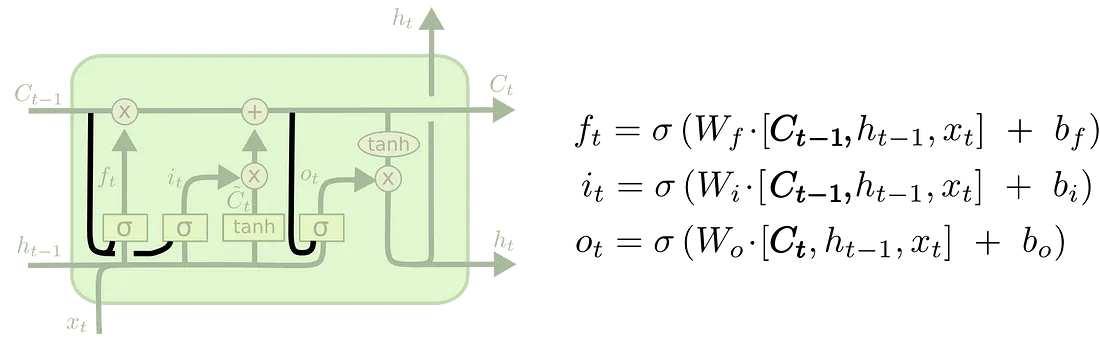


**7.	Bidirectional RNNs** 

- Ans : A Bidirectional RNN is a combination of two RNNs – one RNN moves forward, beginning from the start of the data sequence, and the other, moves backward, beginning from the end of the data sequence. The outputs of these RNNs are combined to produce the final output. One common way to combine the outputs of the forward and reverse RNNs is to concatenate them, but other methods, such as element-wise addition or multiplication can also be used. The choice of combination method can depend on the specific task and the desired properties of the final output. 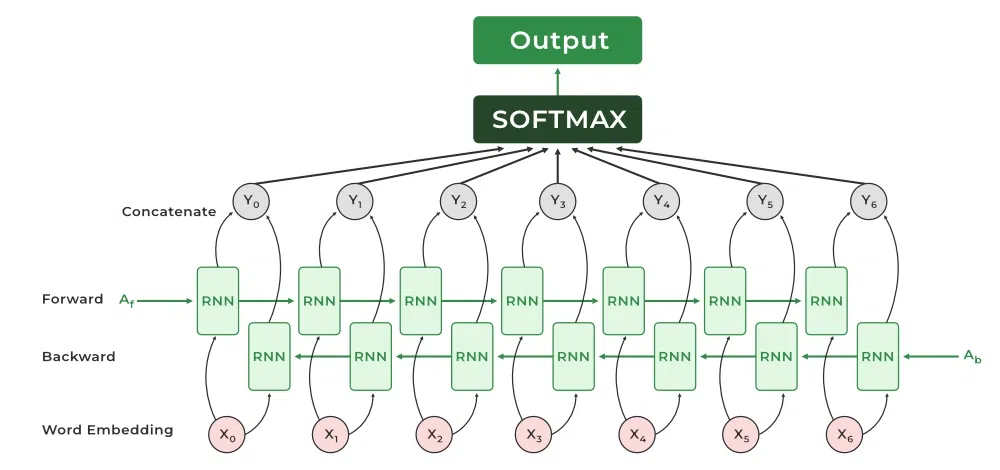

  A Bidirectional RNN has an additional hidden layer to accommodate the backward training process. 


**8.	Explain the gates of LSTM with equations.** 

- Ans : LSTM has 3 kinds of gates. 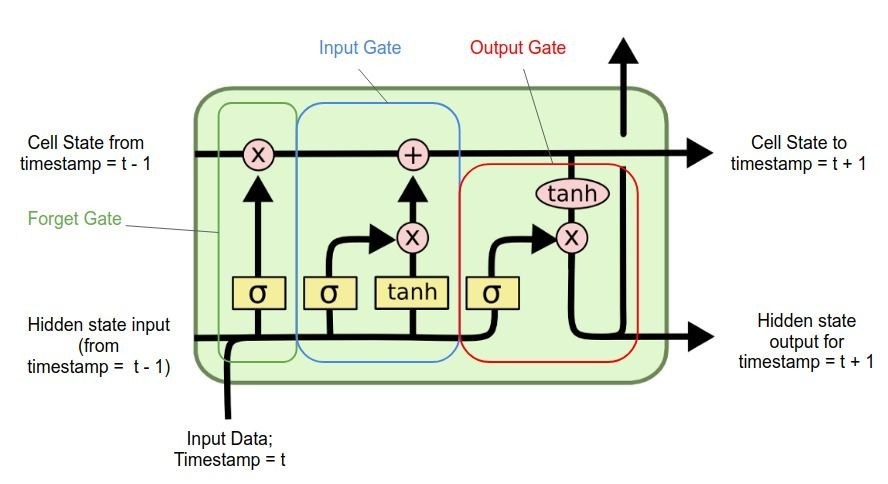
   
   - **Forget gate**  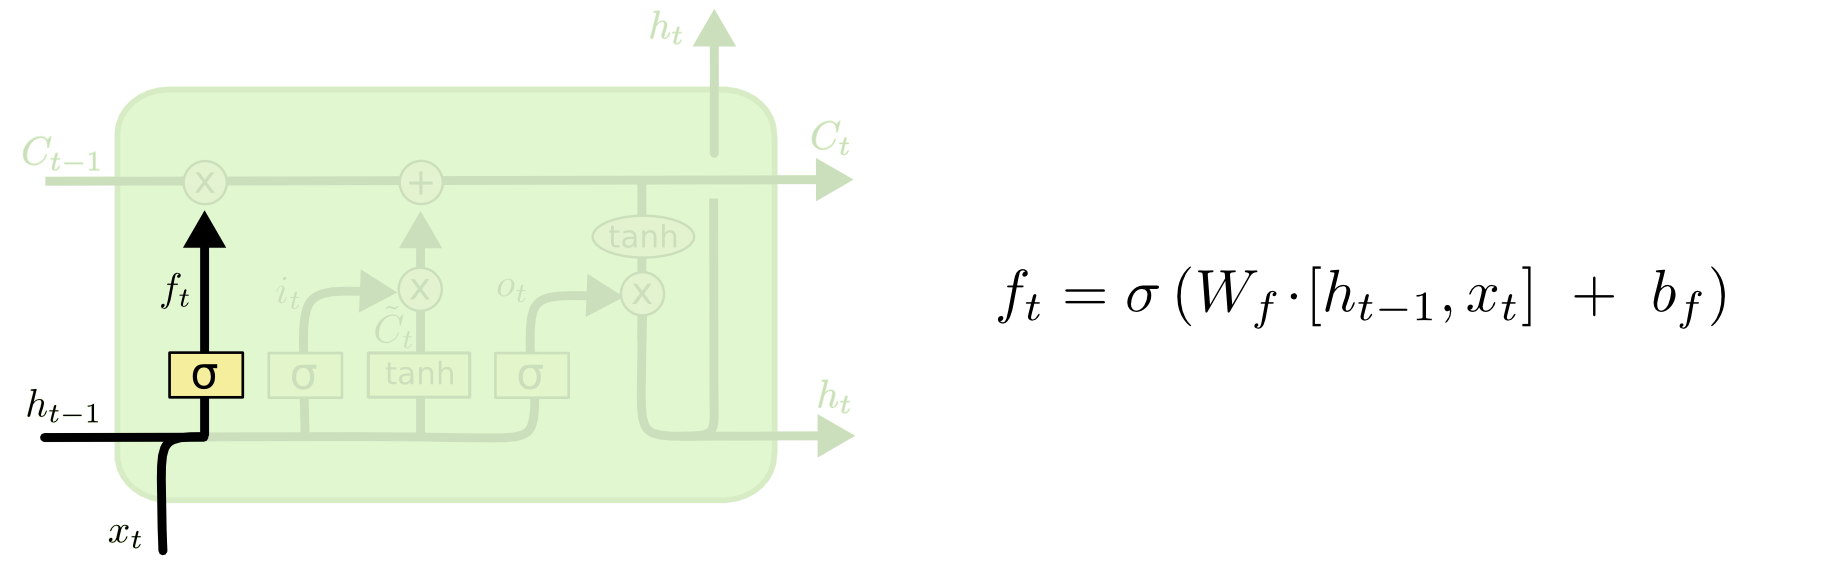
   
     The input $x_t$ from timestamp t and the hidden state $h_{t-1}$ is passed from the previous timestamp. The given inputs are multiplied by the weight matrices and a bias is added. Following this, the sigmoid function is applied to this value. The sigmoid function outputs a vector, with values ranging from 0 to 1, corresponding to each number in the cell state. The sigmoid function is responsible for deciding which values to keep and which to discard. If a ‘0’ is output for a particular value in the cell state, it means that the forget gate wants the cell state to forget that piece of information completely. Similarly, a ‘1’ means that the forget gate wants to remember that entire piece of information. This vector output from the sigmoid function is multiplied by the cell state. Mathematically forget state can be expressed as : $f_t = sigma(W_f[x_t, h_{t_1} + b_f])$
   
   
   - **Input gate** 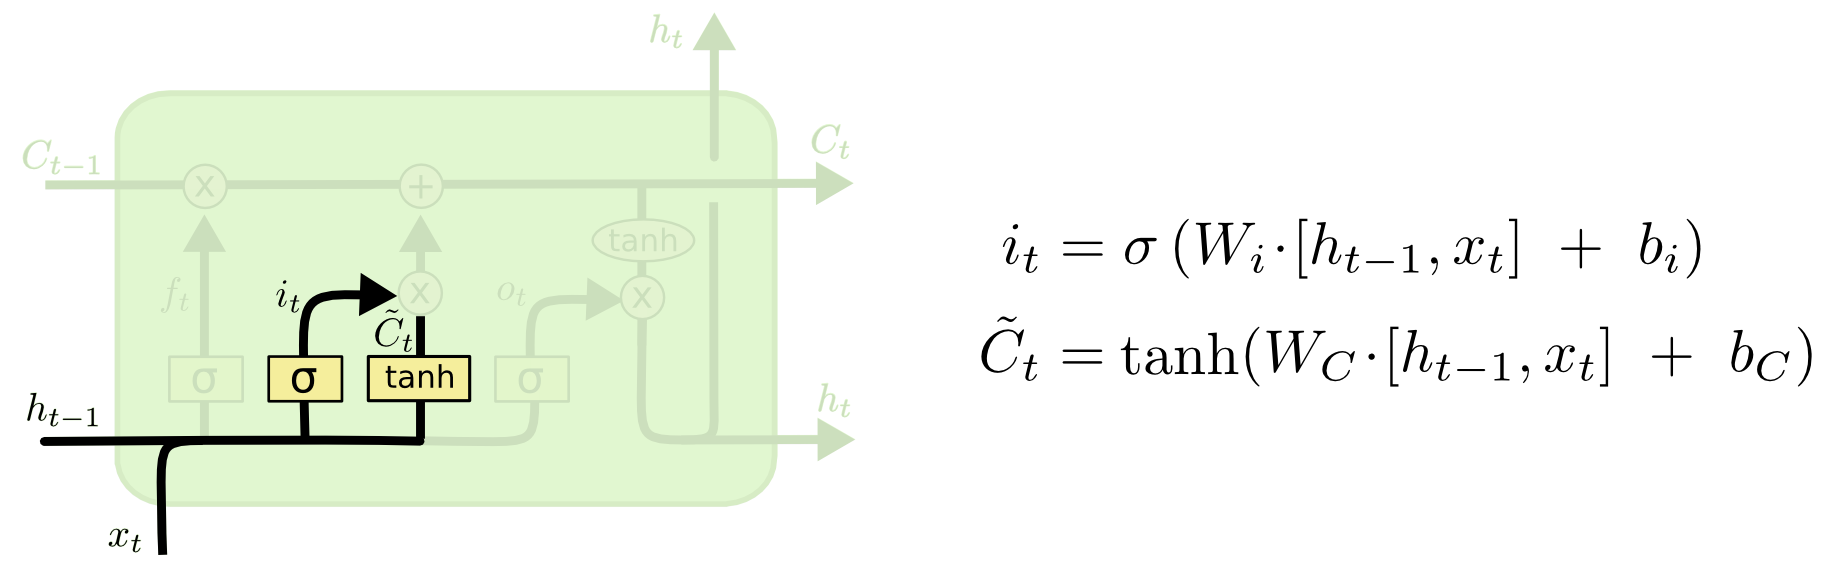
   
     The main purpose of this gate is to find which/what information can be added to the cell state. This is done in three steps. 
     
     First, a sigmoid function is employed which acts like filter for all the information from $x_t$ and $h_{t-1}$. Mathematically this can be written as : $i_t = \sigma (W_i[x_t, h_{t-1}] + b_i)$
     
     In the second step, we need to add all possible values obtained from $x_t$ and $h_{t-1}$ and add those at the cell state. This is obtained by employing tanh activation which results the output from -1 to +1. This can be expressed as : $\tilde{C_t} = tanh(W_C[x_t, h_{t-1}] + b_C) $
     
     
     In the third step, we update the  cell state for which we add the information obtained from the input gate and forget gate. $C_t = f_t . C_{t-1} + i_t . \tilde{C_t}$ 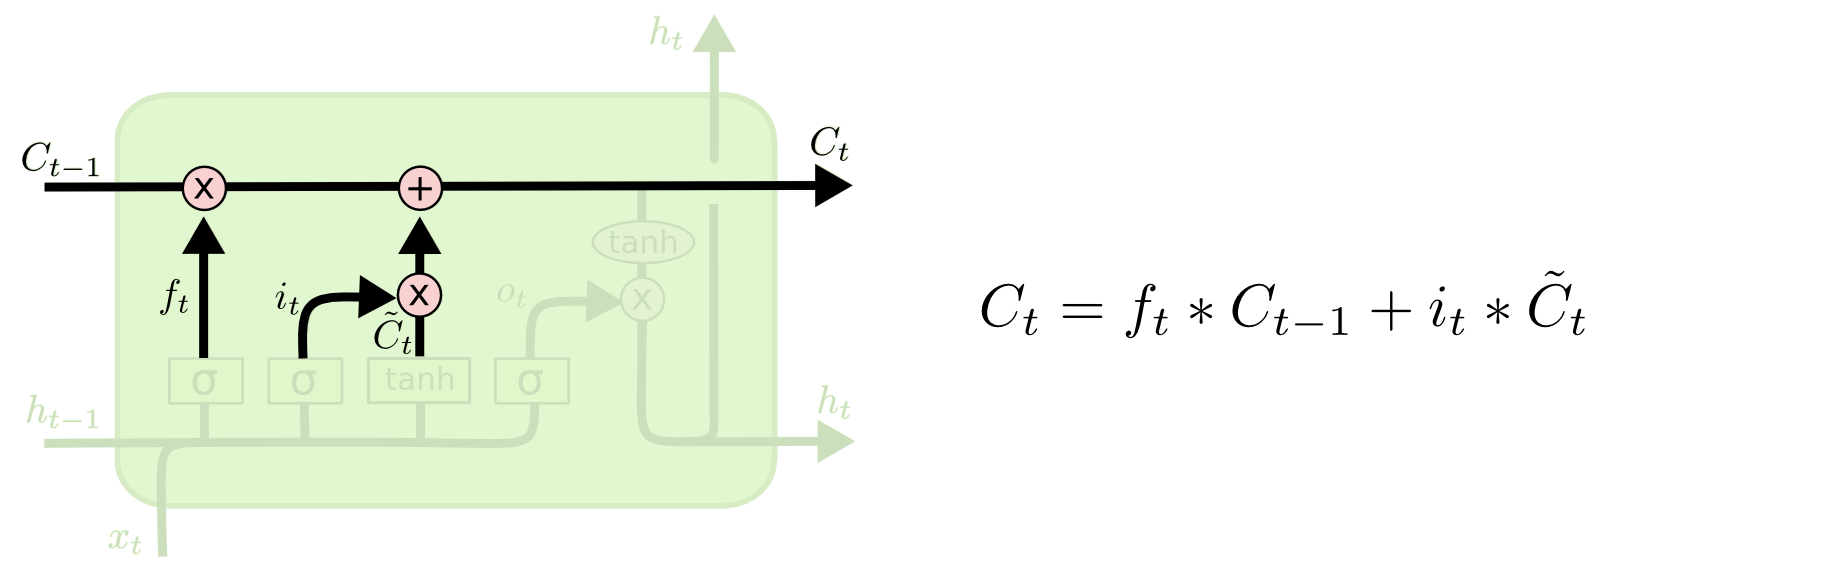
   
   - **Output gate**  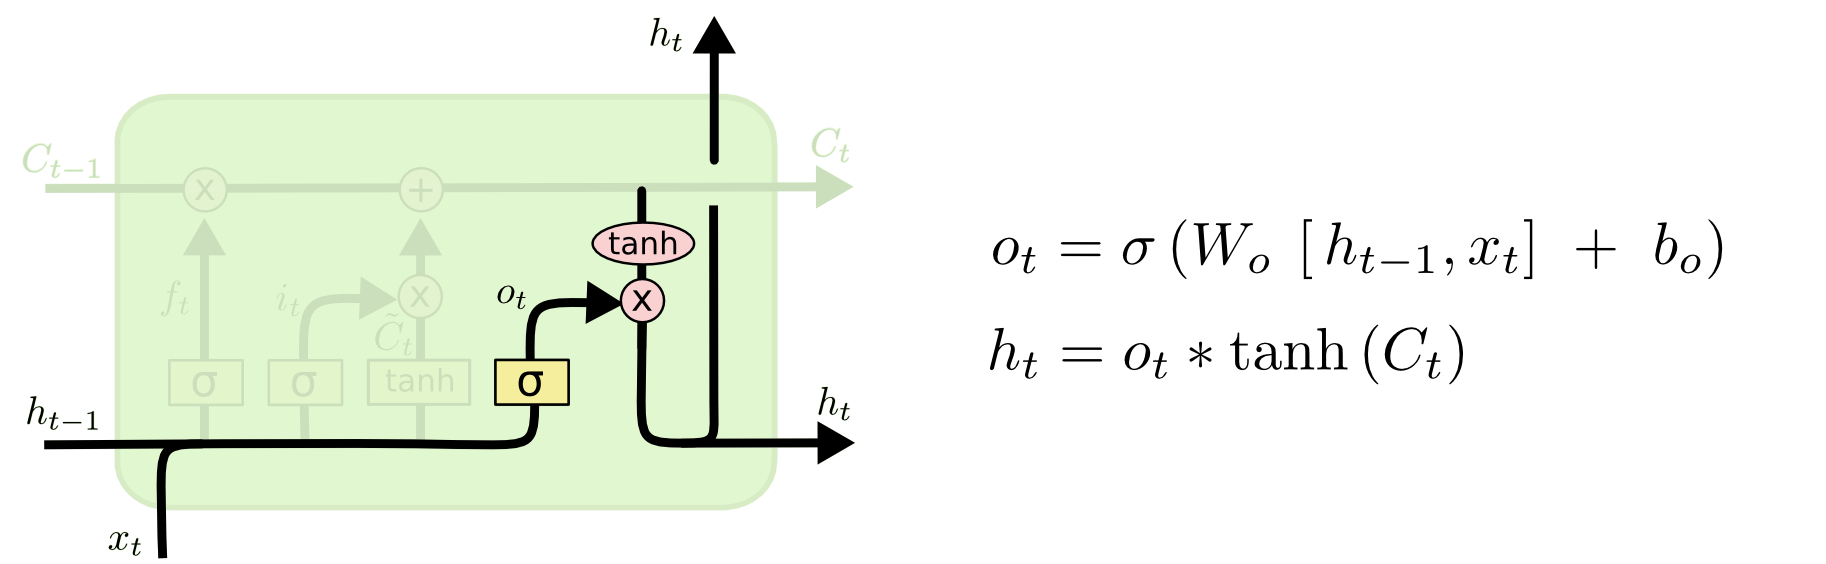
   
     This is the final output and obtained in two steps. In the first step, a sigmoid is used to filter the inputs $x_t$ and $h_{t-1}$. 
     
     The output at this stage is : $o_t = \sigma(W_o[x_t, h_{t-1}] + b_o)$.   
     
     In the second step, the hidden state for this timestamp, i.e. $h_t$ is obtained from $C_t$ passed through a tanh activation and multiplied by $o_t$, i.e.  $h_t = o_t . tanh(C_t)$


**9. Explain BiLSTM** 


- Ans : The bidirectional LSTM comprises of two unidirectional LSTMs which process the sequence in both forward and backward directions. This can be interpreted as having two separate LSTM networks, one gets the sequence of tokens as it is while the other gets in the reverse order. Both of these LSTM network returns a probability vector as output and the final output is the combination of both of these probabilities. 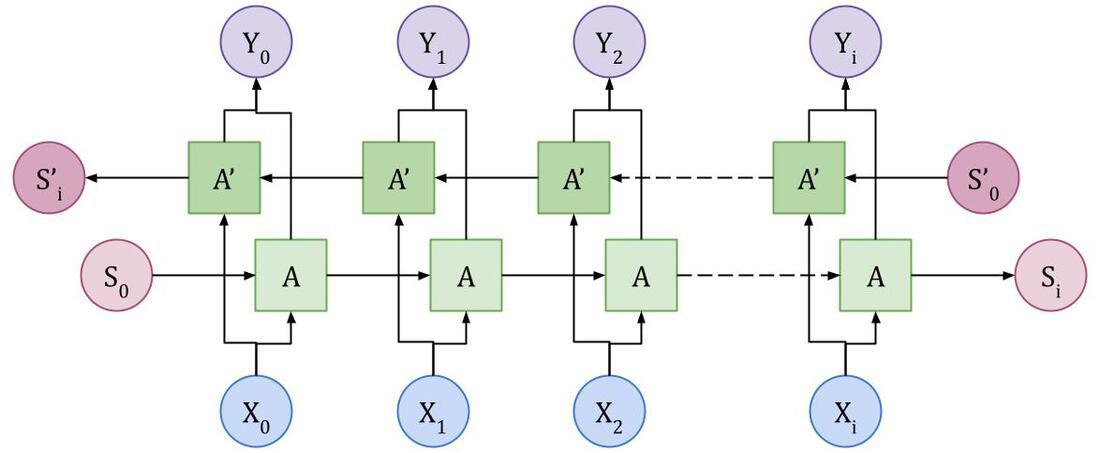

  The figure above shows the architecture of the BiLSTM layer where $X_i$ is the input token, $Y_i$ is the output token, and $A$    and $A'$    are LSTM nodes. The final output of $Y_i$    is the combination of $A$    and $A'$
  LSTM nodes.


**10.	Explain BiGRU** 

- Ans : Bi-GRU has two separate hidden states, one for each direction, and it concatenates the final hidden states from both directions before making its final prediction. This allows the Bi-GRU to capture information from both the past and the future of the input sequence, whereas a regular GRU only has access to information from the past. 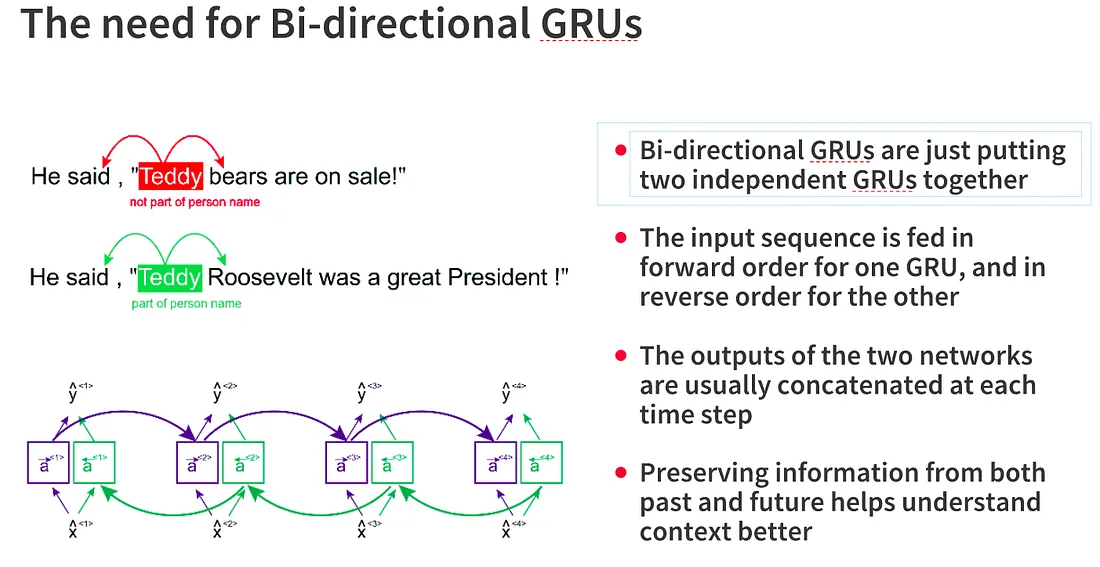
